<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bubble Plots**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be directly loaded into pandas for analysis and visualization.

You will use various visualization techniques to explore the data and uncover key trends.


## Objectives


In this lab, you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two data features.

-   Visualize composition of data.

-   Visualize comparison of data.


#### Setup: Working with the Database
**Install and import the needed libraries**


In [45]:
!pip install pandas 
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [46]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows of the data to understand its structure
df.head()


--2025-12-16 21:45:20--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  52.3MB/s    in 2.9s    

2025-12-16 21:45:24 (52.3 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Exploring Data Distributions Using Bubble Plots


#### 1. Bubble Plot for Age vs. Frequency of Participation


- Visualize the relationship between respondents’ age and their participation frequency (`SOPartFreq`) using a bubble plot.

- Use the size of the bubbles to represent their job satisfaction (`JobSat`).


Initial NaN Valules: 
 SOPartFreq    20200
Age               0
JobSat        36311
dtype: int64 


New NaN Values: 
 SOPartFreq    0
Age           0
JobSat        0
dtype: int64 




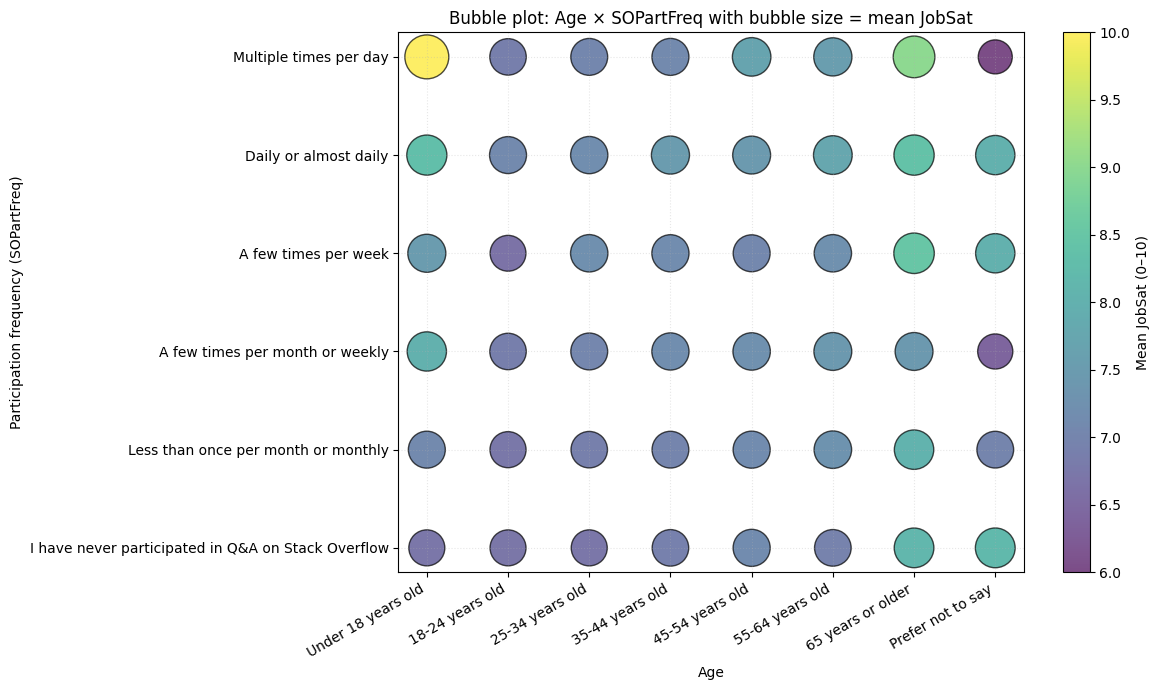

In [47]:
##Write your code here
## Check NaN Values 
print("Initial NaN Valules: \n", df[['SOPartFreq', 'Age', 'JobSat']].isnull().sum(), "\n\n")
## Remove NaN and check
df_new = df[['SOPartFreq', 'Age', 'JobSat']].dropna()
print("New NaN Values: \n", df_new[['SOPartFreq', 'Age', 'JobSat']].isnull().sum(), "\n\n")

## Get Mean JobSat for each Age group
agg = (
    df_new.groupby(['Age', 'SOPartFreq'])
    .agg(mean_job_sat=('JobSat', 'mean'),
        n=('JobSat', 'size'))
    .reset_index()
)

## Map Age
age_order = [
    'Under 18 years old',
    '18-24 years old',
    '25-34 years old',
    '35-44 years old',
    '45-54 years old',
    '55-64 years old',
    '65 years or older',
    'Prefer not to say'
]

## Map SOPartFreq
freq_order = [
    'I have never participated in Q&A on Stack Overflow',
    'Less than once per month or monthly',
    'A few times per month or weekly',
    'A few times per week',
    'Daily or almost daily',
    'Multiple times per day'
]

## Map categories for Age and SOPartFreq to numeric positions
age_pos = {age: i for i, age in enumerate(age_order)}
freq_pos = {freq: i for i, freq in enumerate(freq_order)}
agg['age_x']  = agg['Age'].map(age_pos)
agg['freq_y'] = agg['SOPartFreq'].map(freq_pos)

## Keep rows with valid mappings for SOPartFreq and Age
agg = agg.dropna(subset=['age_x', 'freq_y'])

plt.figure(figsize=(12, 7))
size_scale = 100
plt.scatter(
    agg['age_x'],
    agg['freq_y'],
    s=agg['mean_job_sat'] * size_scale,
    c=agg['mean_job_sat'],
    cmap='viridis',
    alpha=0.7,
    edgecolors='k'
)
plt.xticks(ticks=range(len(age_order)), labels=age_order, rotation=30, ha='right')
plt.yticks(ticks=range(len(freq_order)), labels=freq_order)
plt.xlabel('Age')
plt.ylabel('Participation frequency (SOPartFreq)')
plt.title('Bubble plot: Age × SOPartFreq with bubble size = mean JobSat')
cbar = plt.colorbar()
cbar.set_label('Mean JobSat (0–10)')
plt.grid(True, linestyle=':', alpha=0.3)
plt.tight_layout()
plt.show()

#### 2. Bubble Plot for Compensation vs. Job Satisfaction


-Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSat`).

- Use the size of the bubbles to represent respondents’ age.


NaN Values: 
 ConvertedCompYearly    42002
JobSat                 36311
Age                        0
dtype: int64 


Cleaned Dataframe NaN Values: 
 ConvertedCompYearly    0
JobSat                 0
Age                    0
dtype: int64 


Outliers in ConvertedCompYearly: 
 12723    13818022.0
28379     9000000.0
17593     6340564.0
17672     4936778.0
19267     3367716.0
34523     2153432.0
13763     2048046.0
22842     2014062.0
27902     2000000.0
36329     1900000.0
14145     1750749.0
7979      1728025.0
21367     1562898.0
8898      1500000.0
13755     1500000.0
34317     1500000.0
12143     1332930.0
26572     1295242.0
11607     1273879.0
18038     1200000.0
19244     1200000.0
33936     1200000.0
36299     1140481.0
8818      1074062.0
6897      1052581.0
828       1000000.0
2316      1000000.0
10624     1000000.0
13342     1000000.0
38219     1000000.0
Name: ConvertedCompYearly, dtype: float64 


Are outliers still in ConvertedCompYearly: 
 34523    2153432.0
13763    2048046

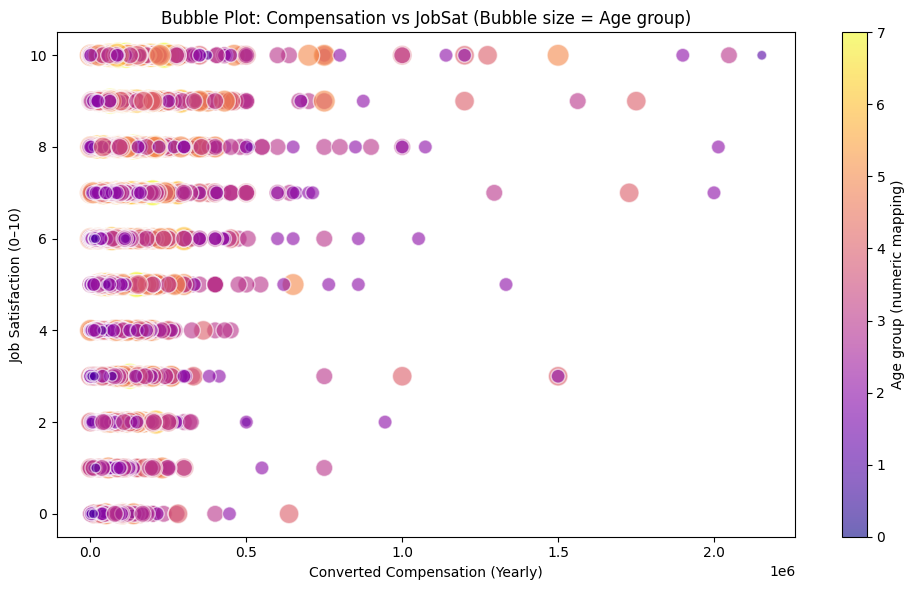

In [48]:
##Write your code here
## Find and Remove NaN
print("NaN Values: \n", df[['ConvertedCompYearly', 'JobSat', 'Age']].isnull().sum(), "\n\n")
df_comp = df.dropna(subset=['ConvertedCompYearly', 'JobSat'])
print("Cleaned Dataframe NaN Values: \n", df_comp[['ConvertedCompYearly', 'JobSat', 'Age']].isnull().sum(), "\n\n")

## Find and Remove Outliers in ConvertedCompYearly
print("Outliers in ConvertedCompYearly: \n", df_comp['ConvertedCompYearly'].nlargest(30), "\n\n")
outliers = df_comp['ConvertedCompYearly'].nlargest(5).index
df_no_outliers = df_comp.drop(outliers)
print("Are outliers still in ConvertedCompYearly: \n", df_no_outliers['ConvertedCompYearly'].nlargest(5), "\n\n")

## Age positional mapping has already been applied
print("Age positional mapping: \n", age_pos, "\n\n")

## Map age positional categories to numeric values
df_no_outliers['age_num'] = df_no_outliers['Age'].map(age_pos)

plt.figure(figsize=(10, 6))
plt.scatter(
    df_no_outliers['ConvertedCompYearly'],
    df_no_outliers['JobSat'],
    s=df_no_outliers['age_num'] * 50,   # bubble size scaled by age group
    c=df_no_outliers['age_num'],        # color by age group
    cmap='plasma',
    alpha=0.6,
    edgecolors='w'
)
plt.xlabel('Converted Compensation (Yearly)')
plt.ylabel('Job Satisfaction (0–10)')
plt.title('Bubble Plot: Compensation vs JobSat (Bubble size = Age group)')
cbar = plt.colorbar()
cbar.set_label('Age group (numeric mapping)')
plt.tight_layout()
plt.show()

### Task 2: Analyzing Relationships Using Bubble Plots


#### 1. Bubble Plot of Technology Preferences by Age

- Visualize the popularity of programming languages respondents have worked with (`LanguageHaveWorkedWith`) across age groups.

- Use bubble size to represent the frequency of each language.



NaN in LanguageHaveWorkedWith: 
 37 


After Cleaning NaN in LanguageHaveWorkedWith: 
 0 




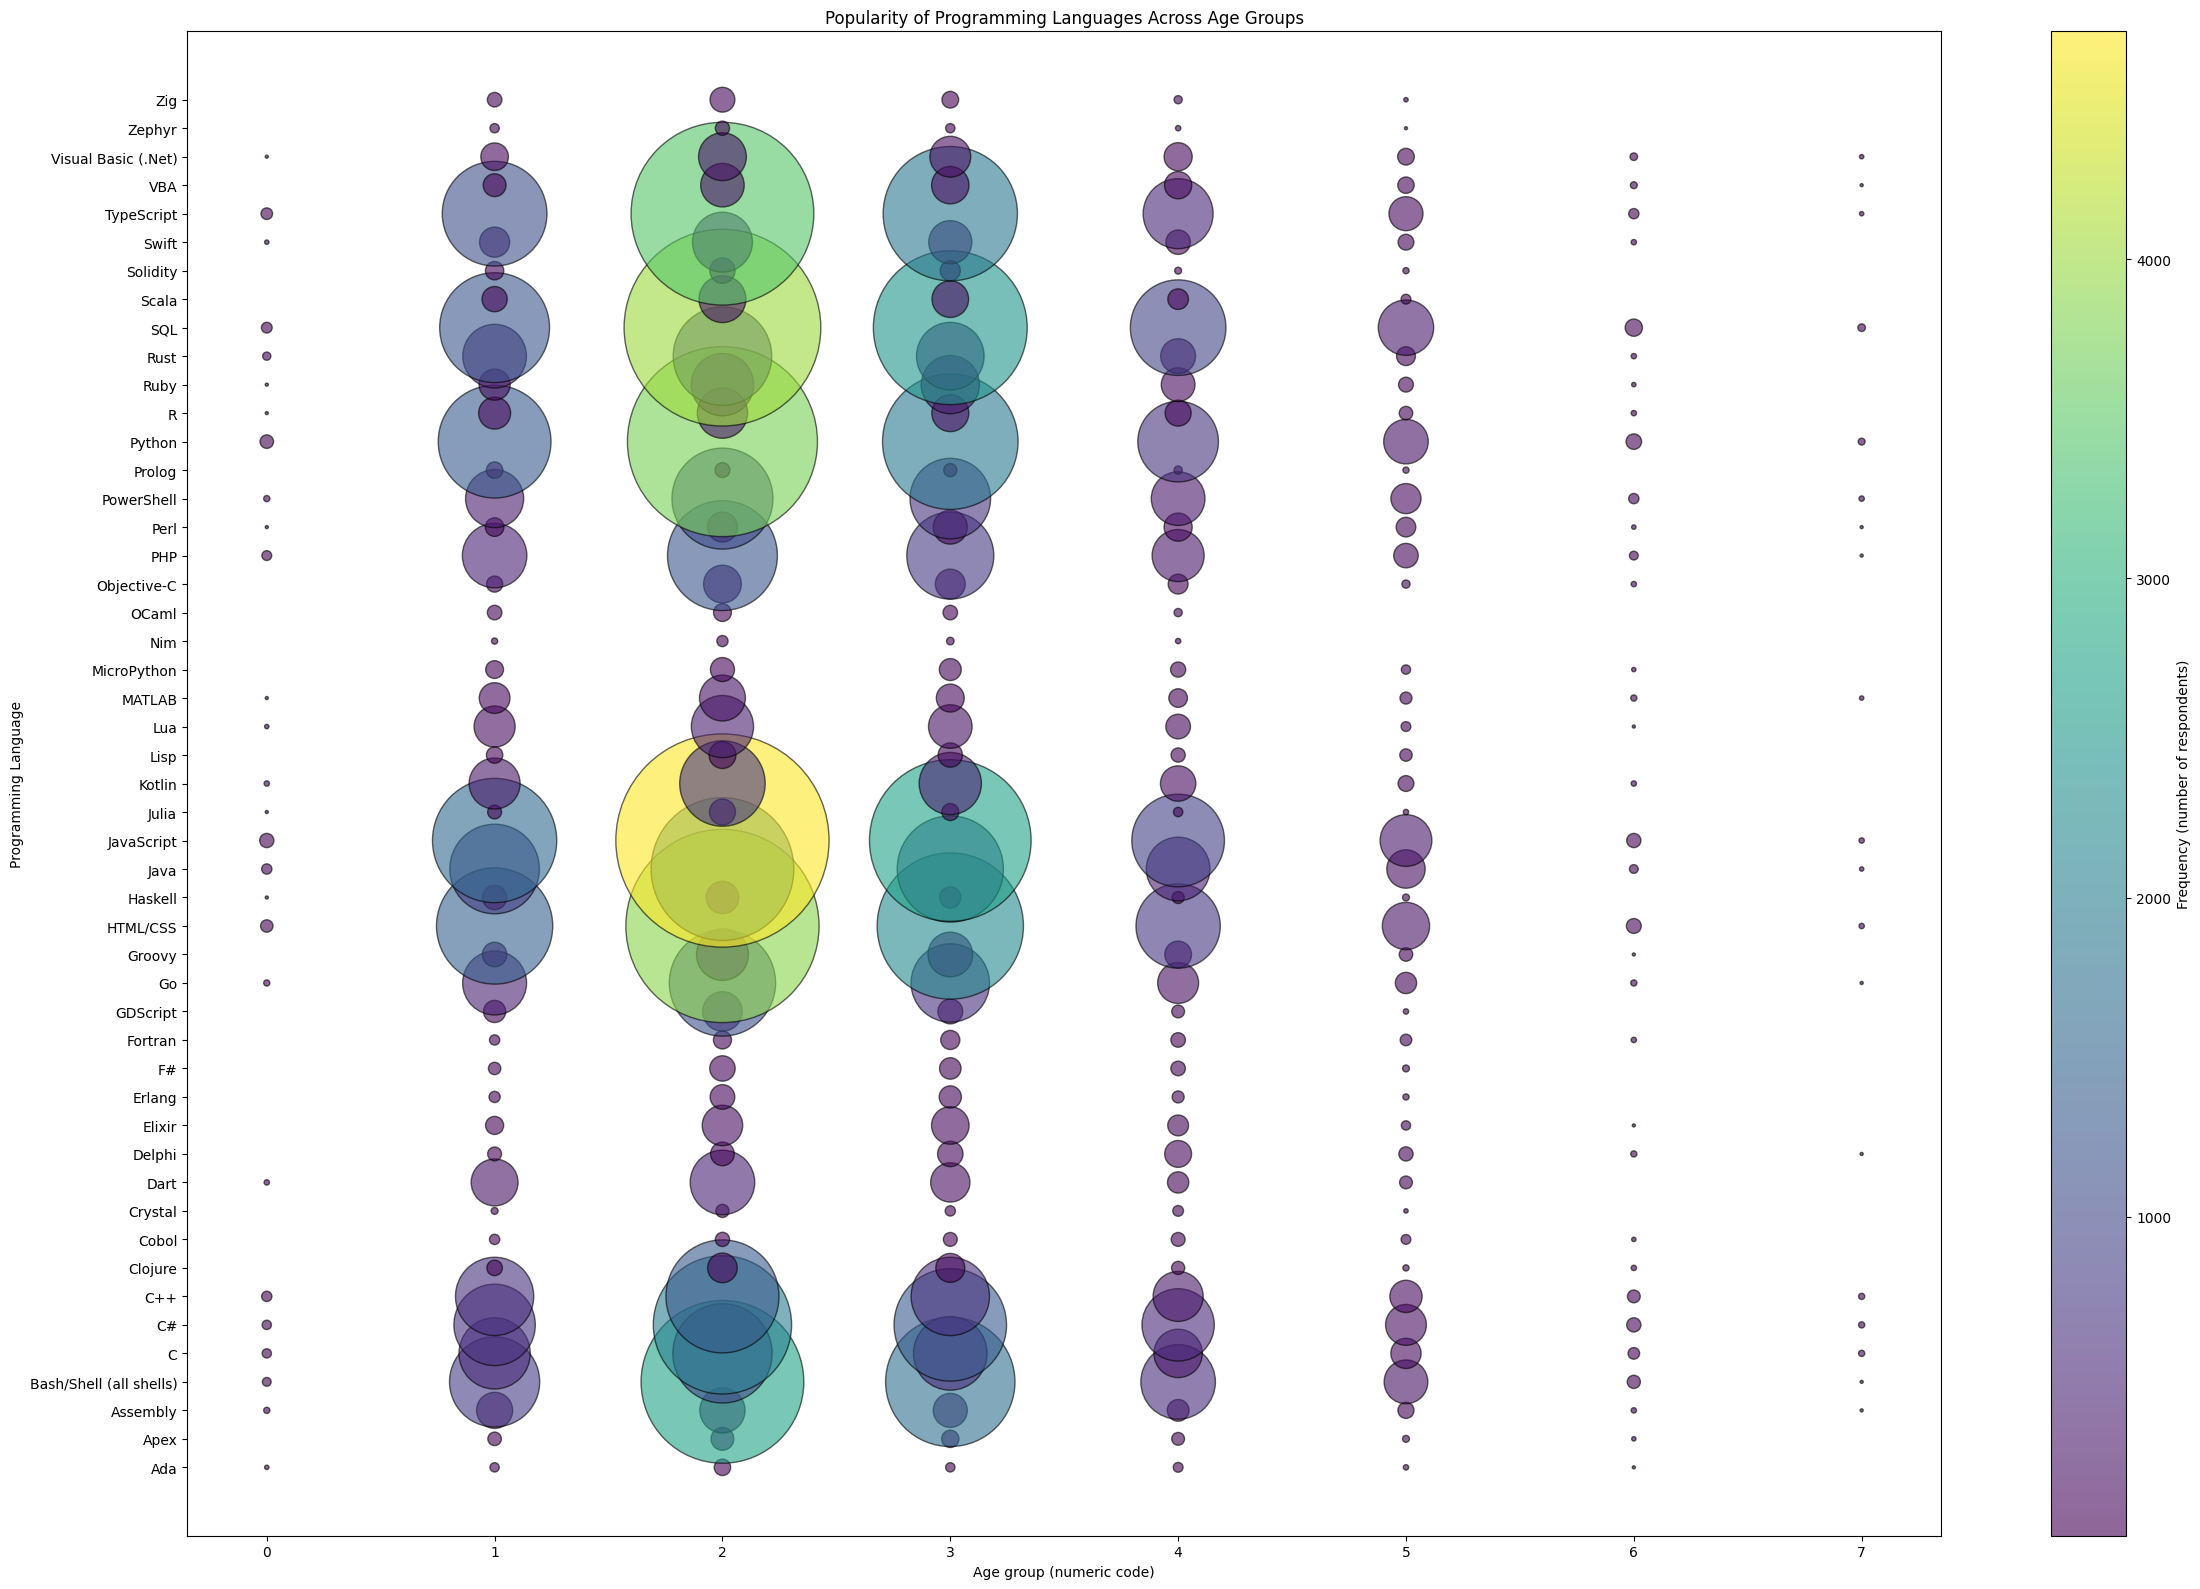

In [49]:
##Write your code here
## Check for NaN and remove
print("NaN in LanguageHaveWorkedWith: \n", df_no_outliers['LanguageHaveWorkedWith'].isnull().sum(), "\n\n")
df_new = df_no_outliers.dropna(subset=['LanguageHaveWorkedWith'])
print("After Cleaning NaN in LanguageHaveWorkedWith: \n", df_new['LanguageHaveWorkedWith'].isnull().sum(), "\n\n")

## Split semi-colon separated values from LanguageHaveWorkedWith
df_lang = df_new.assign(Language=df_new['LanguageHaveWorkedWith'].str.split(';'))

## Explode into one row per language per respondent
df_explode = df_lang.explode('Language')

## Group by language and age_num, count frequency of each language
agg = (
    df_explode.groupby(['Language', 'age_num']).size().reset_index(name='count')
)

plt.figure(figsize=(24,16))
plt.scatter(
    agg['age_num'],
    agg['Language'],
    s=agg['count'] * 5,
    c=agg['count'],
    cmap='viridis',
    alpha=0.6,
    edgecolors='k'
)
plt.xlabel('Age group (numeric code)')
plt.ylabel('Programming Language')
plt.title('Popularity of Programming Languages Across Age Groups')
cbar = plt.colorbar()
cbar.set_label('Frequency (number of respondents)')
plt.tight_layout()
plt.show()

#### 2. Bubble Plot for Preferred Databases vs. Job Satisfaction

- Explore the relationship between preferred databases (`DatabaseWantToWorkWith`) and job satisfaction.

- Use bubble size to indicate the number of respondents for each database.


Starting NaN values: 
 JobSat                       0
DatabaseWantToWorkWith    3487
dtype: int64 


NaN Values after cleaning: 
 JobSat                    0
DatabaseWantToWorkWith    0
dtype: int64 


Value_counts of DatabaseWantToWorkWith: 
 DatabaseWantToWorkWith
PostgreSQL                                                                                 1146
Microsoft SQL Server                                                                        463
PostgreSQL;SQLite                                                                           433
SQLite                                                                                      347
PostgreSQL;Redis                                                                            304
                                                                                           ... 
Cloud Firestore;Cosmos DB;Firebase Realtime Database;Microsoft SQL Server;MongoDB;MySQL       1
Cloud Firestore;InfluxDB;MariaDB;MongoDB;PostgreSQL;Redis    

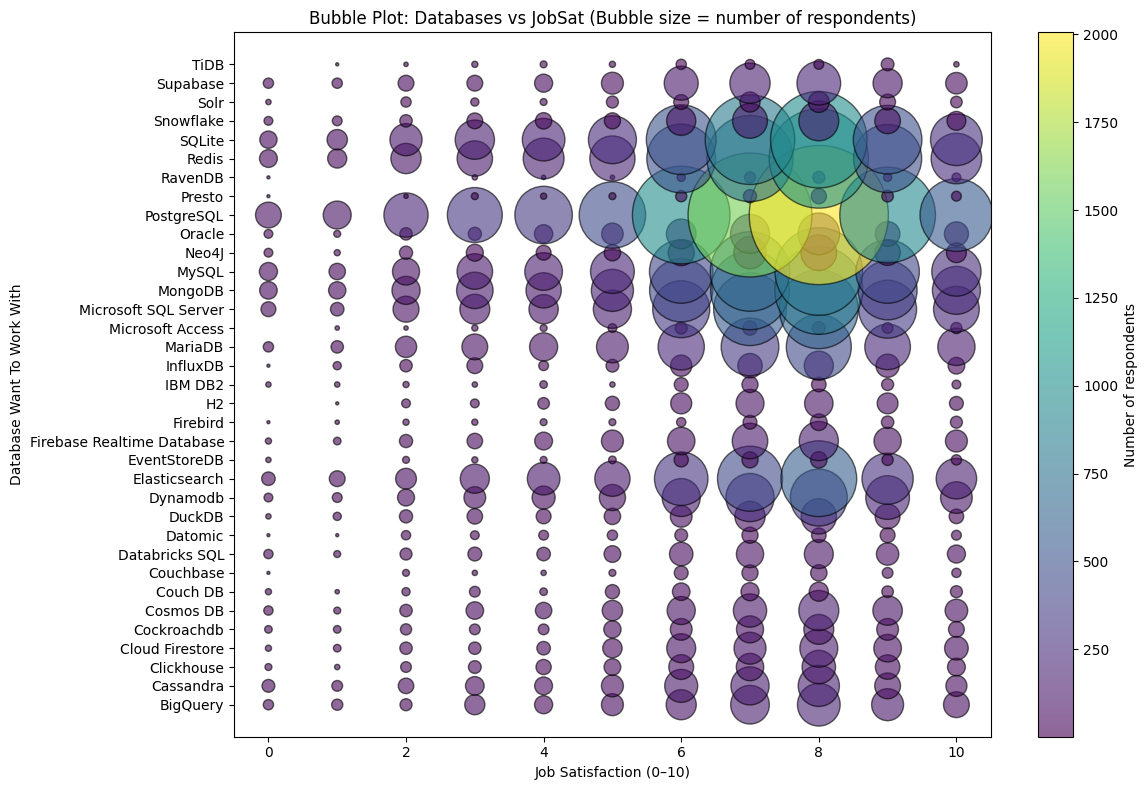

In [50]:
##Write your code here
## Find NaN values and drop them
print("Starting NaN values: \n", df_new[['JobSat', 'DatabaseWantToWorkWith']].isnull().sum(), "\n\n")
df_nan = df_new.dropna(subset=['DatabaseWantToWorkWith'])
print("NaN Values after cleaning: \n", df_nan[['JobSat', 'DatabaseWantToWorkWith']].isnull().sum(), "\n\n")

## Value_counts() of DatabaseWantToWorkWith and JobSat
print("Value_counts of DatabaseWantToWorkWith: \n", df_nan['DatabaseWantToWorkWith'].value_counts(), "\n\n")
print("Value_counts of JobSat: \n", df_nan['JobSat'].value_counts(), "\n\n")

## Split semi-colon separated values
df_db = df_nan.assign(Database=df_nan['DatabaseWantToWorkWith'].str.split(';'))

## Explode into one row per database per respondent
df_db = df_db.explode('Database')

## Group by Database and JobSat, and count respondents
agg = (
    df_db.groupby(['Database', 'JobSat']).size().reset_index(name='count')
)

plt.figure(figsize=(12, 8))
plt.scatter(
    agg['JobSat'],
    agg['Database'],
    s=agg['count'] * 5,
    c=agg['count'],
    cmap='viridis',
    alpha=0.6,
    edgecolors='k'
)
plt.xlabel('Job Satisfaction (0–10)')
plt.ylabel('Database Want To Work With')
plt.title('Bubble Plot: Databases vs JobSat (Bubble size = number of respondents)')
cbar = plt.colorbar()
cbar.set_label('Number of respondents')
plt.tight_layout()
plt.show()

### Task 3: Comparing Data Using Bubble Plots


#### 1. Bubble Plot for Compensation Across Developer Roles

- Visualize compensation (`ConvertedCompYearly`) across different developer roles (`DevType`).

- Use bubble size to represent job satisfaction.


NaN Values for ConvertedCompYearly and DevType: 
 ConvertedCompYearly    42002
DevType                 5992
dtype: int64 


Cleaned Dataframe NaN Values: 
 ConvertedCompYearly    0
DevType                0
dtype: int64 




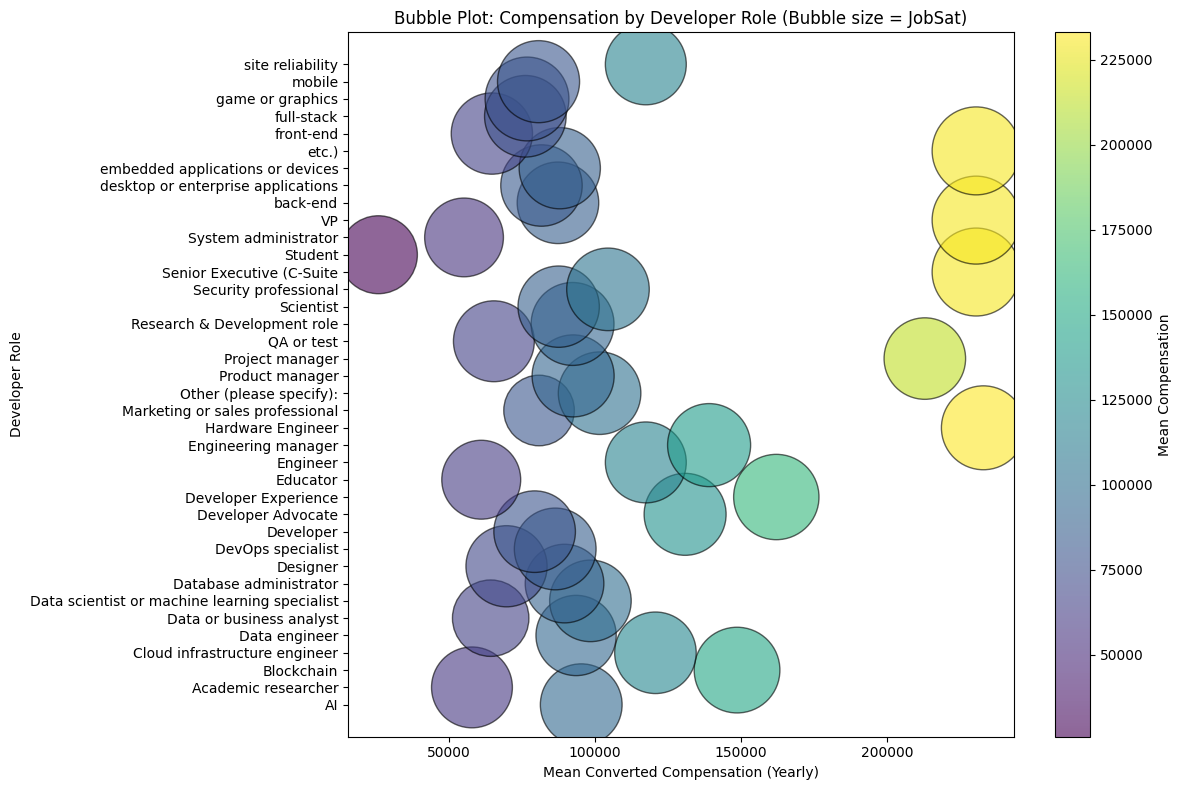

In [51]:
##Write your code here
## Find NaN values and drop them
print("NaN Values for ConvertedCompYearly and DevType: \n", df[['ConvertedCompYearly', 'DevType']].isnull().sum(), "\n\n")
df_a = df.dropna(subset=['ConvertedCompYearly', 'DevType'])
print("Cleaned Dataframe NaN Values: \n", df_a[['ConvertedCompYearly', 'DevType']].isnull().sum(), "\n\n")

## Split Comma-Separated Values from DevType
df_b = df_a.assign(Role=df_a['DevType'].str.split(','))

## Explode Role into one row per role
df_b = df_b.explode('Role')

## Clean up white space
df_b['Role'] = df_b['Role'].str.strip()

## Aggregate the mean ConvertedCompYearly and count per role
agg = (
    df_b.groupby('Role').agg(mean_comp=('ConvertedCompYearly', 'mean'), mean_jobsat=('JobSat', 'mean'), count=('ConvertedCompYearly', 'size')).reset_index()
)

plt.figure(figsize=(12, 8))
plt.scatter(
    agg['mean_comp'],
    agg['Role'],
    s=agg['mean_jobsat'] * 500,
    c=agg['mean_comp'],
    cmap='viridis',
    alpha=0.6,
    edgecolors='k'
)
plt.xlabel('Mean Converted Compensation (Yearly)')
plt.ylabel('Developer Role')
plt.title('Bubble Plot: Compensation by Developer Role (Bubble size = JobSat)')
cbar = plt.colorbar()
cbar.set_label('Mean Compensation')
plt.tight_layout()
plt.show()

#### 2. Bubble Plot for Collaboration Tools by Age

- Visualize the relationship between the collaboration tools used (`NEWCollabToolsHaveWorkedWith`) and age groups.

- Use bubble size to represent the frequency of tool usage.


NaN Values: 
 NEWCollabToolsHaveWorkedWith    7845
Age                                0
dtype: int64 


Cleaned NaN Values: 
 NEWCollabToolsHaveWorkedWith    0
Age                             0
dtype: int64 




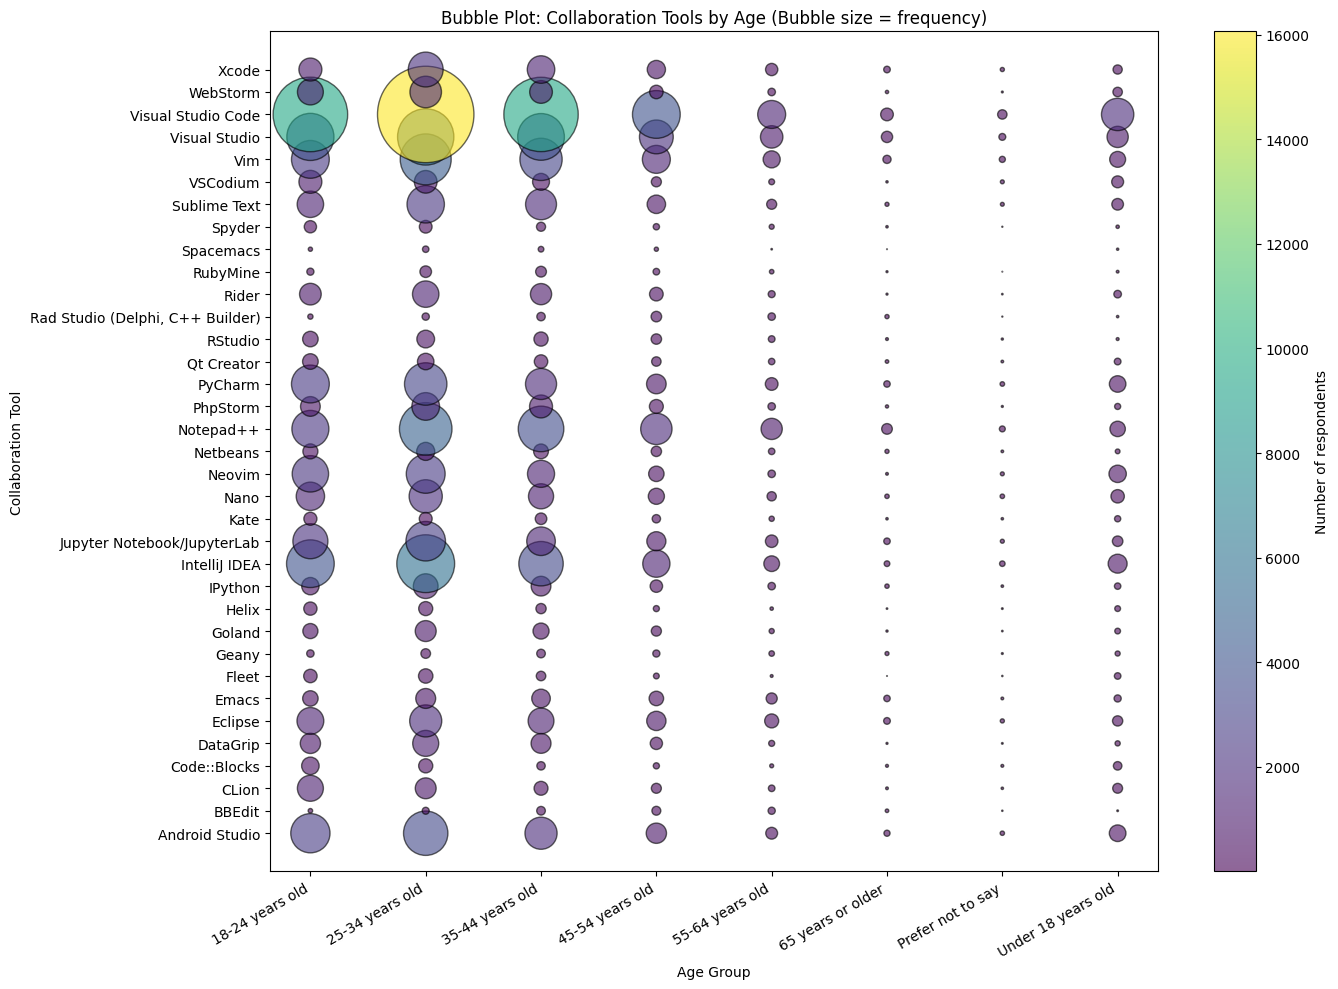

In [52]:
##Write your code here
## Find NaN Values and Drop
print("NaN Values: \n", df[['NEWCollabToolsHaveWorkedWith', 'Age']].isnull().sum(), "\n\n")
df_c = df.dropna(subset=['NEWCollabToolsHaveWorkedWith'])
print("Cleaned NaN Values: \n", df_c[['NEWCollabToolsHaveWorkedWith', 'Age']].isnull().sum(), "\n\n")

## Split semi-colon separated values
df_d = df_c.assign(Tools=df_c['NEWCollabToolsHaveWorkedWith'].str.split(';'))

## Explode Tools to one tool per row per respondent
df_d = df_d.explode('Tools')

## Clean up white space
df_d['Tools'] = df_d['Tools'].str.strip()

## Group by tool and age and count the frequency of tool usage
agg = (
    df_d.groupby(['Tools', 'Age']).size().reset_index(name='count')
)

plt.figure(figsize=(14, 10))
plt.scatter(
    agg['Age'],
    agg['Tools'],
    s=agg['count'] * 0.3,
    c=agg['count'],
    cmap='viridis',
    alpha=0.6,
    edgecolors='k'
)
plt.xlabel('Age Group')
plt.ylabel('Collaboration Tool')
plt.title('Bubble Plot: Collaboration Tools by Age (Bubble size = frequency)')
cbar = plt.colorbar()
cbar.set_label('Number of respondents')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

### Task 4: Visualizing Technology Trends Using Bubble Plots


#### 1. Bubble Plot for Preferred Web Frameworks vs. Job Satisfaction

- Explore the relationship between preferred web frameworks (`WebframeWantToWorkWith`) and job satisfaction.

- Use bubble size to represent the number of respondents.



NaN Values: 
 WebframeWantToWorkWith    26902
JobSat                    36311
dtype: int64 


Cleaned NaN Values: 
 WebframeWantToWorkWith    0
JobSat                    0
dtype: int64 




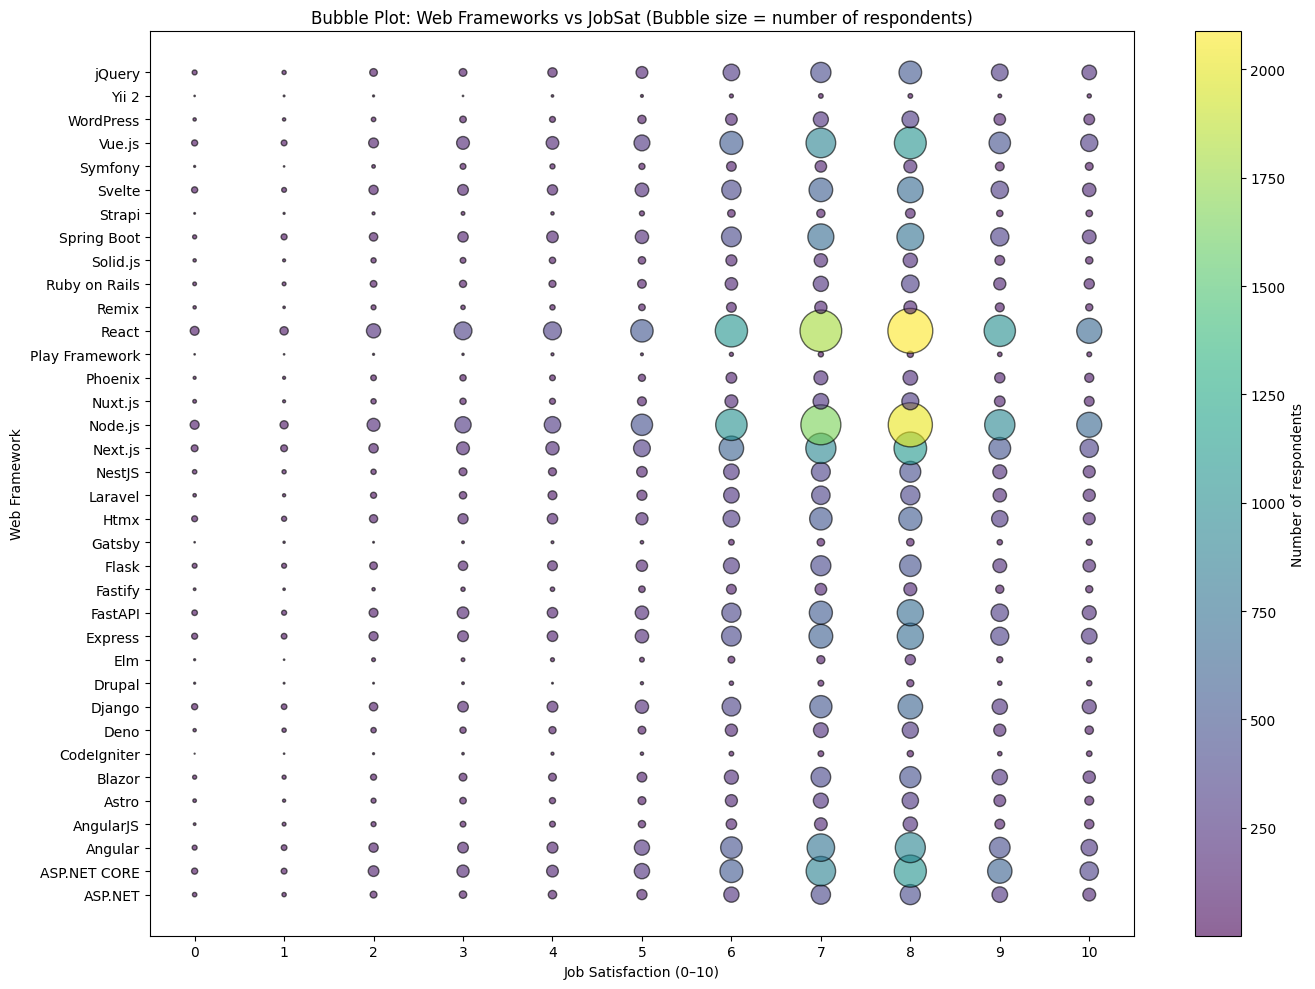

In [53]:
##Write your code here
## Check for NaN and drop them
print("NaN Values: \n", df[['WebframeWantToWorkWith', 'JobSat']].isnull().sum(), "\n\n")
df_a = df.dropna(subset=['WebframeWantToWorkWith', 'JobSat'])
print("Cleaned NaN Values: \n", df_a[['WebframeWantToWorkWith', 'JobSat']].isnull().sum(), "\n\n")

## Split semi-colon separated values in WebframeWantToWorkWith
df_b = df_a.assign(Webframe=df_a['WebframeWantToWorkWith'].str.split(';'))

## Explode Webframe to one Webframe per row per respondent
df_b = df_b.explode('Webframe')

## Clean up white space
df_b['Webframe'] = df_b['Webframe'].str.strip()

## Group by Webframe and JobSat, and count respondents
agg = (
    df_b.groupby(['Webframe', 'JobSat']).size().reset_index(name='count')
)

plt.figure(figsize=(14, 10))
plt.scatter(
    agg['JobSat'],
    agg['Webframe'],
    s=agg['count'] * 0.5,
    c=agg['count'],
    cmap='viridis',
    alpha=0.6,
    edgecolors='k'
)
plt.xlabel('Job Satisfaction (0–10)')
plt.ylabel('Web Framework')
plt.title('Bubble Plot: Web Frameworks vs JobSat (Bubble size = number of respondents)')
cbar = plt.colorbar()
cbar.set_label('Number of respondents')
plt.xticks(range(11))
plt.tight_layout()
plt.show()

#### 2. Bubble Plot for Admired Technologies Across Countries

- Visualize the distribution of admired technologies (`LanguageAdmired`) across different countries (`Country`).

- Use bubble size to represent the frequency of admiration.



NaN Values: 
 LanguageAdmired    14565
Country             6507
dtype: int64 


NaN Values: 
 LanguageAdmired    0
Country            0
dtype: int64 


Value_counts after splitting semi-colons: 
 Language
[Python]                                                                                       1480
[HTML/CSS, JavaScript, TypeScript]                                                             1018
[C#]                                                                                            870
[Python, SQL]                                                                                   648
[Java]                                                                                          553
                                                                                               ... 
[Assembly, C#, HTML/CSS, JavaScript, PowerShell]                                                  1
[Apex, Bash/Shell (all shells), HTML/CSS, Java, JavaScript, PowerShell, Python, TypeScript]    

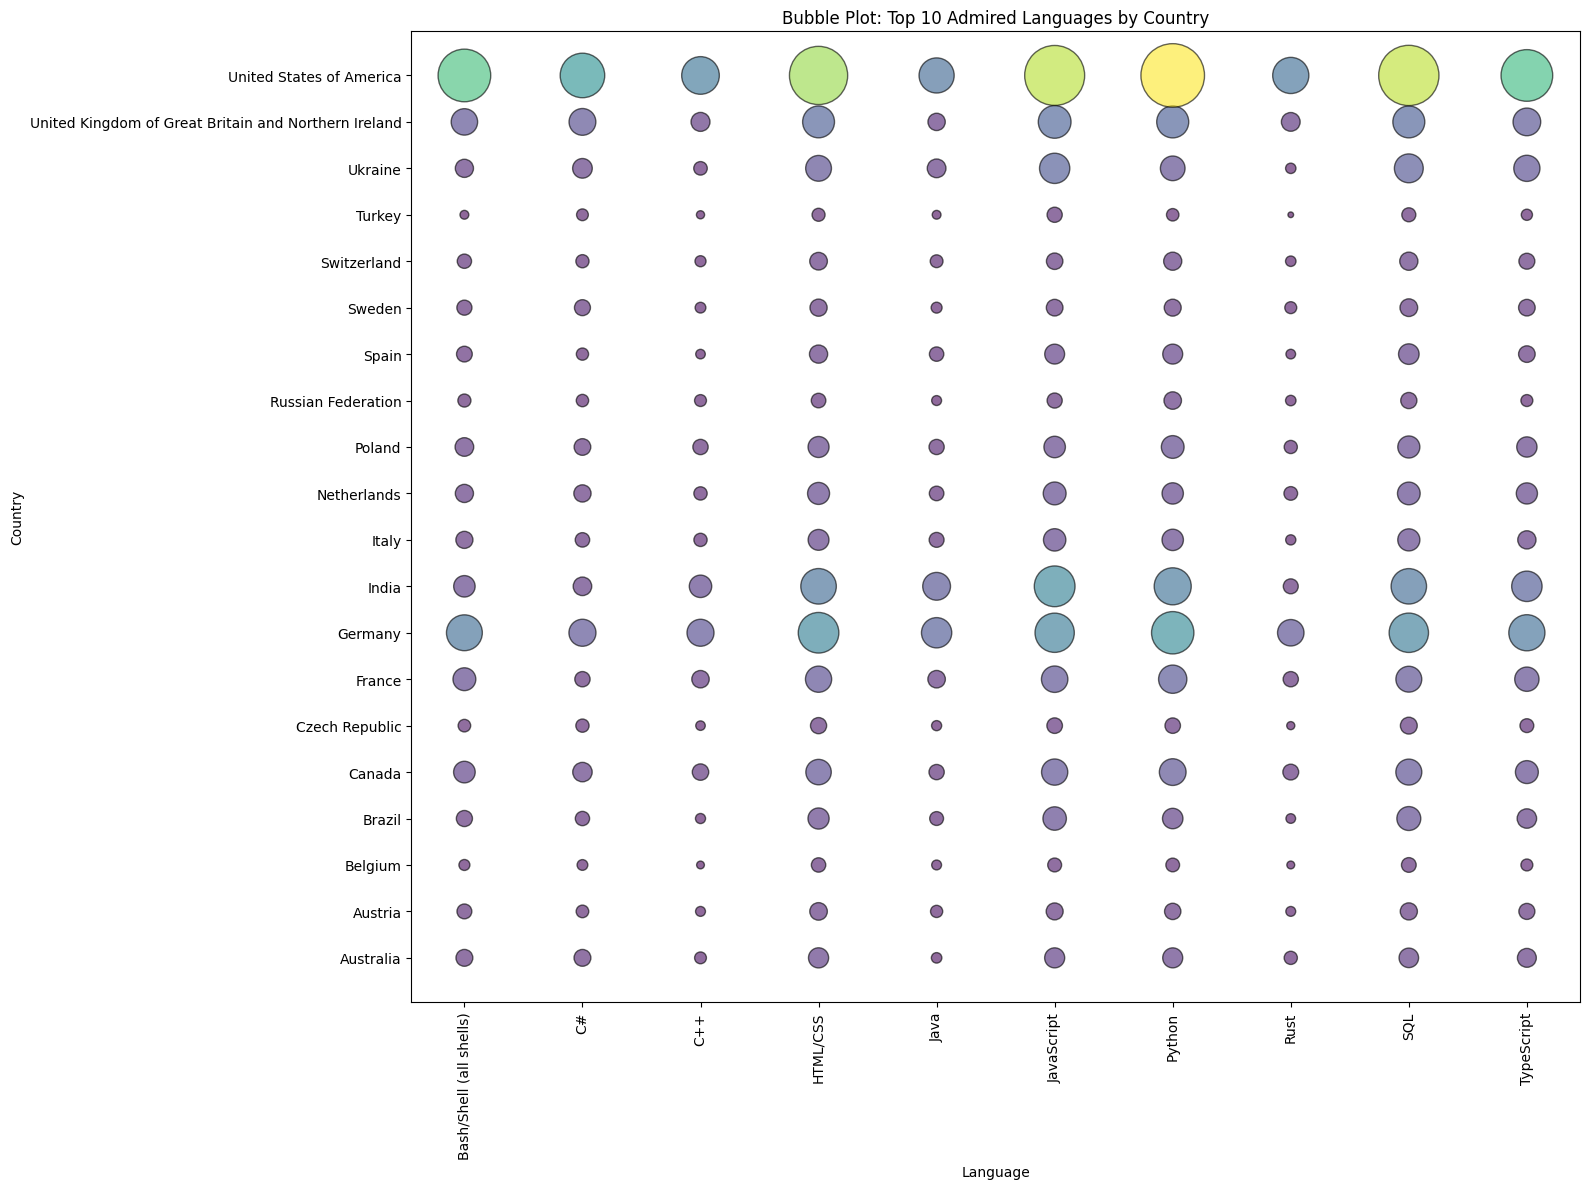

In [67]:
##Write your code here
## Find NaN Values and drop them
print("NaN Values: \n", df[['LanguageAdmired', 'Country']].isnull().sum(), "\n\n")
df_a = df.dropna(subset=['LanguageAdmired', 'Country'])
print("NaN Values: \n", df_a[['LanguageAdmired', 'Country']].isnull().sum(), "\n\n")

## Split semicolon-separated values
df_b = df_a.assign(Language=df_a['LanguageAdmired'].str.split(';'))
print("Value_counts after splitting semi-colons: \n", df_b['Language'].value_counts(), "\n\n")

## Explode Language to one language per row per respondent
df_c = df_b.explode('Language')

## Clean up white space
df_c['Language'] = df_c['Language'].str.strip()
print("Language after exploding into one language per row per respondent, and cleaning white space: \n", df_c['Language'].value_counts(), "\n\n")

## Group by Language and Country, and count respondents
agg = (
    df_c.groupby(['Language', 'Country']).size().reset_index(name='count')
)

## Filter top 10 languages to avoid crowding the bubble plot
top_languages = df_c['Language'].value_counts().nlargest(10).index

## Filter top 20 countries to avoid crowding the bubble plot
top_countries = df_c['Country'].value_counts().nlargest(20).index

## Apply both filters
agg_top = agg[agg['Language'].isin(top_languages) & agg['Country'].isin(top_countries)]

plt.figure(figsize=(16, 12))
plt.scatter(
    agg_top['Language'],
    agg_top['Country'],
    s=agg_top['count'] * 0.5,
    c=agg_top['count'],
    cmap='viridis',
    alpha=0.6,
    edgecolors='k'
)
plt.xticks(rotation=90)
plt.xlabel('Language')
plt.ylabel('Country')
plt.title('Bubble Plot: Top 10 Admired Languages by Country')
plt.tight_layout()
plt.show()

## Final Step: Review


After completing the lab, you will have extensively used bubble plots to gain insights into developer community preferences, demographics, compensation trends, and job satisfaction.


## Summary


After completing this lab, you will be able to:

- Create and interpret bubble plots to analyze relationships and compositions within datasets.

- Use bubble plots to explore developer preferences, compensation trends, and satisfaction levels.

- Apply bubble plots to visualize complex relationships involving multiple dimensions effectively.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-29|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
